<a href="https://colab.research.google.com/github/heyrimz/2023_bigdata-AI/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C_2020112322_%EC%A3%BC%ED%98%9C%EB%A6%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
url = "http://apis.data.go.kr/1520635/OceanMensurationService/getOceanMesurationListcoo"
key = "?ServiceKey=WBSEAH3qxb3Pi5jYigju1rClMrB4a3Bfr4vtAjRR2KsFbaOtI4h6wfrEwSKYiIkpbY8PGm4E2R2vVFjwpEDeRg%3D%3D"
params ={'numOfRows' : '30', 'pageNo' : '1', 'OCEAN' : '동해', 'sta_cde' : '11701' }

In [ ]:
import requests
# url 불러오기
response = requests.get(url+key,params=params)

In [ ]:
#데이터 값 출력
contents = response.text
print(contents)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><airTmp>24.6</airTmp><obsDat>2023-06-13</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>19.5</wtrTmp></item><item><airTmp>20.3</airTmp><obsDat>2023-06-12</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>19.4</wtrTmp></item><item><airTmp>24.2</airTmp><obsDat>2023-06-09</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>20.2</wtrTmp></item><item><airTmp>24.1</airTmp><obsDat>2023-06-08</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>20</wtrTmp></item><item><airTmp>24.2</airTmp><obsDat>2023-06-07</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>20.2</wtrTmp></item><item><airTmp>24.6</airTmp><obsDat>2023-06-05</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staN

In [ ]:
import xml.etree.ElementTree as et
import bs4
from lxml import html

xml_obj = bs4.BeautifulSoup(contents,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><airTmp>24.6</airTmp><obsDat>2023-06-13</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>19.5</wtrTmp></item>, <item><airTmp>20.3</airTmp><obsDat>2023-06-12</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>19.4</wtrTmp></item>, <item><airTmp>24.2</airTmp><obsDat>2023-06-09</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>20.2</wtrTmp></item>, <item><airTmp>24.1</airTmp><obsDat>2023-06-08</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>20</wtrTmp></item>, <item><airTmp>24.2</airTmp><obsDat>2023-06-07</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>20.2</wtrTmp></item>, <item><airTmp>24.6</airTmp><obsDat>2023-06-05</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>20</wtrTmp></item>, <item><airTmp>23.9</airTmp><obsDat>2023-06-02</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamK

In [ ]:
import pandas as pd

name_list = []
value_list = []
row_list = []

for i in range(len(rows)):
  cols = rows[i].find_all()
  # print(cols)
  for j in range(len(cols)):
    if i == 0:
      name_list.append(cols[j].name)
    value_list.append(cols[j].text)
  row_list.append(value_list)
  value_list = []
    # print(cols[j].text)
    # print(cols[j].name)


df = pd.DataFrame(row_list,columns = name_list)
df
df.to_csv("해양수산부 국립수산과학원_연안정지관측정보(2023).csv",encoding='cp949')
# print(name_list)
# print(value_list)
# print(row_list)

In [ ]:
url2 = "http://apis.data.go.kr/1520635/OceanMensurationService/getOceanMesurationListcoo"
key2 = "?ServiceKey=WBSEAH3qxb3Pi5jYigju1rClMrB4a3Bfr4vtAjRR2KsFbaOtI4h6wfrEwSKYiIkpbY8PGm4E2R2vVFjwpEDeRg%3D%3D"
params2 ={'numOfRows' : '30', 'pageNo' : '53', 'OCEAN' : '동해', 'sta_cde' : '11701' }

In [ ]:
import requests
# url 불러오기
response = requests.get(url2+key2,params=params2)

In [ ]:
#데이터 값 출력
contents = response.text
print(contents)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><airTmp>21.1</airTmp><obsDat>2017-05-11</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>14.8</wtrTmp></item><item><airTmp>17.2</airTmp><obsDat>2017-05-10</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>14.7</wtrTmp></item><item><obsDat>2017-05-09</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor></item><item><airTmp>23.8</airTmp><obsDat>2017-05-08</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>14.6</wtrTmp></item><item><obsDat>2017-05-07</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor></item><item><obsDat>2017-05-06</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor></item><item><obsDat>2017-05-05</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</sta

In [ ]:
import xml.etree.ElementTree as et
import bs4
from lxml import html

xml_obj = bs4.BeautifulSoup(contents,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><airTmp>21.1</airTmp><obsDat>2017-05-11</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>14.8</wtrTmp></item>, <item><airTmp>17.2</airTmp><obsDat>2017-05-10</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>14.7</wtrTmp></item>, <item><obsDat>2017-05-09</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor></item>, <item><airTmp>23.8</airTmp><obsDat>2017-05-08</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>14.6</wtrTmp></item>, <item><obsDat>2017-05-07</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor></item>, <item><obsDat>2017-05-06</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor></item>, <item><obsDat>2017-05-05</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor></item>, <item><airTmp>22.5</airTmp><obsDat>2017-05-04</obsDat><ocean>동해</ocean><staCde>11701</staCde><staNamKor>포항</staNamKor><wtrTmp>16.5<

In [ ]:
name_list2 = []
value_list2 = []
row_list2 = []

for i in range(len(rows)):
  cols = rows[i].find_all()
  # print(cols)
  for j in range(len(cols)):
    if i == 0:
      name_list2.append(cols[j].name)
    value_list2.append(cols[j].text)
  row_list2.append(value_list2)
  value_list2 = []
    # print(cols[j].text)
    # print(cols[j].name)


df2 = pd.DataFrame(row_list2,columns = name_list2)
df2
df2.to_csv("해양수산부 국립수산과학원_연안정지관측정보(2017).csv",encoding='cp949')
# print(name_list2)
# print(value_list2)
# print(row_list2)

In [ ]:
df

,airTmp,obsDat,ocean,staCde,staNamKor,wtrTmp
0,24.6,2023-06-13,동해,11701,포항,19.5
1,20.3,2023-06-12,동해,11701,포항,19.4
2,24.2,2023-06-09,동해,11701,포항,20.2
3,24.1,2023-06-08,동해,11701,포항,20
4,24.2,2023-06-07,동해,11701,포항,20.2
5,24.6,2023-06-05,동해,11701,포항,20
6,23.9,2023-06-02,동해,11701,포항,20.5
7,21.2,2023-06-01,동해,11701,포항,18.5
8,19.8,2023-05-31,동해,11701,포항,18.7
9,18.7,2023-05-30,동해,11701,포항,19.4


In [ ]:
df2

,airTmp,obsDat,ocean,staCde,staNamKor,wtrTmp
0,21.1,2017-05-11,동해,11701,포항,14.8
1,17.2,2017-05-10,동해,11701,포항,14.7
2,2017-05-09,동해,11701,포항,None,None
3,23.8,2017-05-08,동해,11701,포항,14.6
4,2017-05-07,동해,11701,포항,None,None
5,2017-05-06,동해,11701,포항,None,None
6,2017-05-05,동해,11701,포항,None,None
7,22.5,2017-05-04,동해,11701,포항,16.5
8,2017-05-03,동해,11701,포항,None,None
9,16.6,2017-05-02,동해,11701,포항,15.3


In [ ]:
df2 = df2.drop([3,4,10,11,17,18,24,25,28])
df2

,airTmp,obsDat,ocean,staCde,staNamKor,wtrTmp
0,21.1,2017-05-11,동해,11701,포항,14.8
1,17.2,2017-05-10,동해,11701,포항,14.7
2,2017-05-09,동해,11701,포항,None,None
5,2017-05-06,동해,11701,포항,None,None
6,2017-05-05,동해,11701,포항,None,None
7,22.5,2017-05-04,동해,11701,포항,16.5
8,2017-05-03,동해,11701,포항,None,None
9,16.6,2017-05-02,동해,11701,포항,15.3
12,2017-04-29,동해,11701,포항,None,None
13,18.3,2017-04-28,동해,11701,포항,15.3


In [ ]:
df2 = df2.drop([2,5,6,8,12,19,26]).reset_index()
df2

,index,airTmp,obsDat,ocean,staCde,staNamKor,wtrTmp
0,0,21.1,2017-05-11,동해,11701,포항,14.8
1,1,17.2,2017-05-10,동해,11701,포항,14.7
2,7,22.5,2017-05-04,동해,11701,포항,16.5
3,9,16.6,2017-05-02,동해,11701,포항,15.3
4,13,18.3,2017-04-28,동해,11701,포항,15.3
5,14,15.6,2017-04-27,동해,11701,포항,15.1
6,15,14.2,2017-04-26,동해,11701,포항,14.9
7,16,21,2017-04-25,동해,11701,포항,15.6
8,20,16.9,2017-04-21,동해,11701,포항,14.4
9,21,17.4,2017-04-20,동해,11701,포항,14.6


In [ ]:
df2 = df2.loc[:,'airTmp':]  # B열부터 끝까지 출력
df2

,airTmp,obsDat,ocean,staCde,staNamKor,wtrTmp
0,21.1,2017-05-11,동해,11701,포항,14.8
1,17.2,2017-05-10,동해,11701,포항,14.7
2,22.5,2017-05-04,동해,11701,포항,16.5
3,16.6,2017-05-02,동해,11701,포항,15.3
4,18.3,2017-04-28,동해,11701,포항,15.3
5,15.6,2017-04-27,동해,11701,포항,15.1
6,14.2,2017-04-26,동해,11701,포항,14.9
7,21,2017-04-25,동해,11701,포항,15.6
8,16.9,2017-04-21,동해,11701,포항,14.4
9,17.4,2017-04-20,동해,11701,포항,14.6


In [ ]:
print(df.loc[0])

airTmp             24.6
obsDat       2023-06-13
ocean                동해
staCde            11701
staNamKor            포항
wtrTmp             19.5
Name: 0, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   airTmp     30 non-null     object
 1   obsDat     30 non-null     object
 2   ocean      30 non-null     object
 3   staCde     30 non-null     object
 4   staNamKor  30 non-null     object
 5   wtrTmp     30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [ ]:
df = df.astype({'airTmp':'float','wtrTmp':'float'})
df

,airTmp,obsDat,ocean,staCde,staNamKor,wtrTmp
0,24.6,2023-06-13,동해,11701,포항,19.5
1,20.3,2023-06-12,동해,11701,포항,19.4
2,24.2,2023-06-09,동해,11701,포항,20.2
3,24.1,2023-06-08,동해,11701,포항,20.0
4,24.2,2023-06-07,동해,11701,포항,20.2
5,24.6,2023-06-05,동해,11701,포항,20.0
6,23.9,2023-06-02,동해,11701,포항,20.5
7,21.2,2023-06-01,동해,11701,포항,18.5
8,19.8,2023-05-31,동해,11701,포항,18.7
9,18.7,2023-05-30,동해,11701,포항,19.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airTmp     30 non-null     float64
 1   obsDat     30 non-null     object 
 2   ocean      30 non-null     object 
 3   staCde     30 non-null     object 
 4   staNamKor  30 non-null     object 
 5   wtrTmp     30 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.5+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   airTmp     14 non-null     object
 1   obsDat     14 non-null     object
 2   ocean      14 non-null     object
 3   staCde     14 non-null     object
 4   staNamKor  14 non-null     object
 5   wtrTmp     14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [ ]:
df2 = df2.astype({'airTmp':'float','wtrTmp':'float'})
df2

,airTmp,obsDat,ocean,staCde,staNamKor,wtrTmp
0,21.1,2017-05-11,동해,11701,포항,14.8
1,17.2,2017-05-10,동해,11701,포항,14.7
2,22.5,2017-05-04,동해,11701,포항,16.5
3,16.6,2017-05-02,동해,11701,포항,15.3
4,18.3,2017-04-28,동해,11701,포항,15.3
5,15.6,2017-04-27,동해,11701,포항,15.1
6,14.2,2017-04-26,동해,11701,포항,14.9
7,21.0,2017-04-25,동해,11701,포항,15.6
8,16.9,2017-04-21,동해,11701,포항,14.4
9,17.4,2017-04-20,동해,11701,포항,14.6


In [ ]:
airTmp_stats_2023 = df['airTmp'].describe()
airTmp_stats_2023

count    30.000000
mean     20.450000
std       3.688823
min      10.600000
25%      18.700000
50%      19.900000
75%      23.875000
max      28.200000
Name: airTmp, dtype: float64

In [ ]:
wtrTmp_stats_2023 = df['wtrTmp'].describe()
wtrTmp_stats_2023

count    30.000000
mean     17.120000
std       2.306572
min      13.800000
25%      15.300000
50%      16.750000
75%      19.300000
max      20.500000
Name: wtrTmp, dtype: float64

In [ ]:
airTmp_stats_2017 = df2['airTmp'].describe()
print(airTmp_stats_2017)

count    14.000000
mean     17.485714
std       2.802158
min      11.800000
25%      16.375000
50%      17.200000
75%      18.600000
max      22.500000
Name: airTmp, dtype: float64


In [ ]:
wtrTmp_stats_2017 = df2['wtrTmp'].describe()
wtrTmp_stats_2017

count    14.000000
mean     14.921429
std       0.621634
min      14.000000
25%      14.525000
50%      14.800000
75%      15.250000
max      16.500000
Name: wtrTmp, dtype: float64

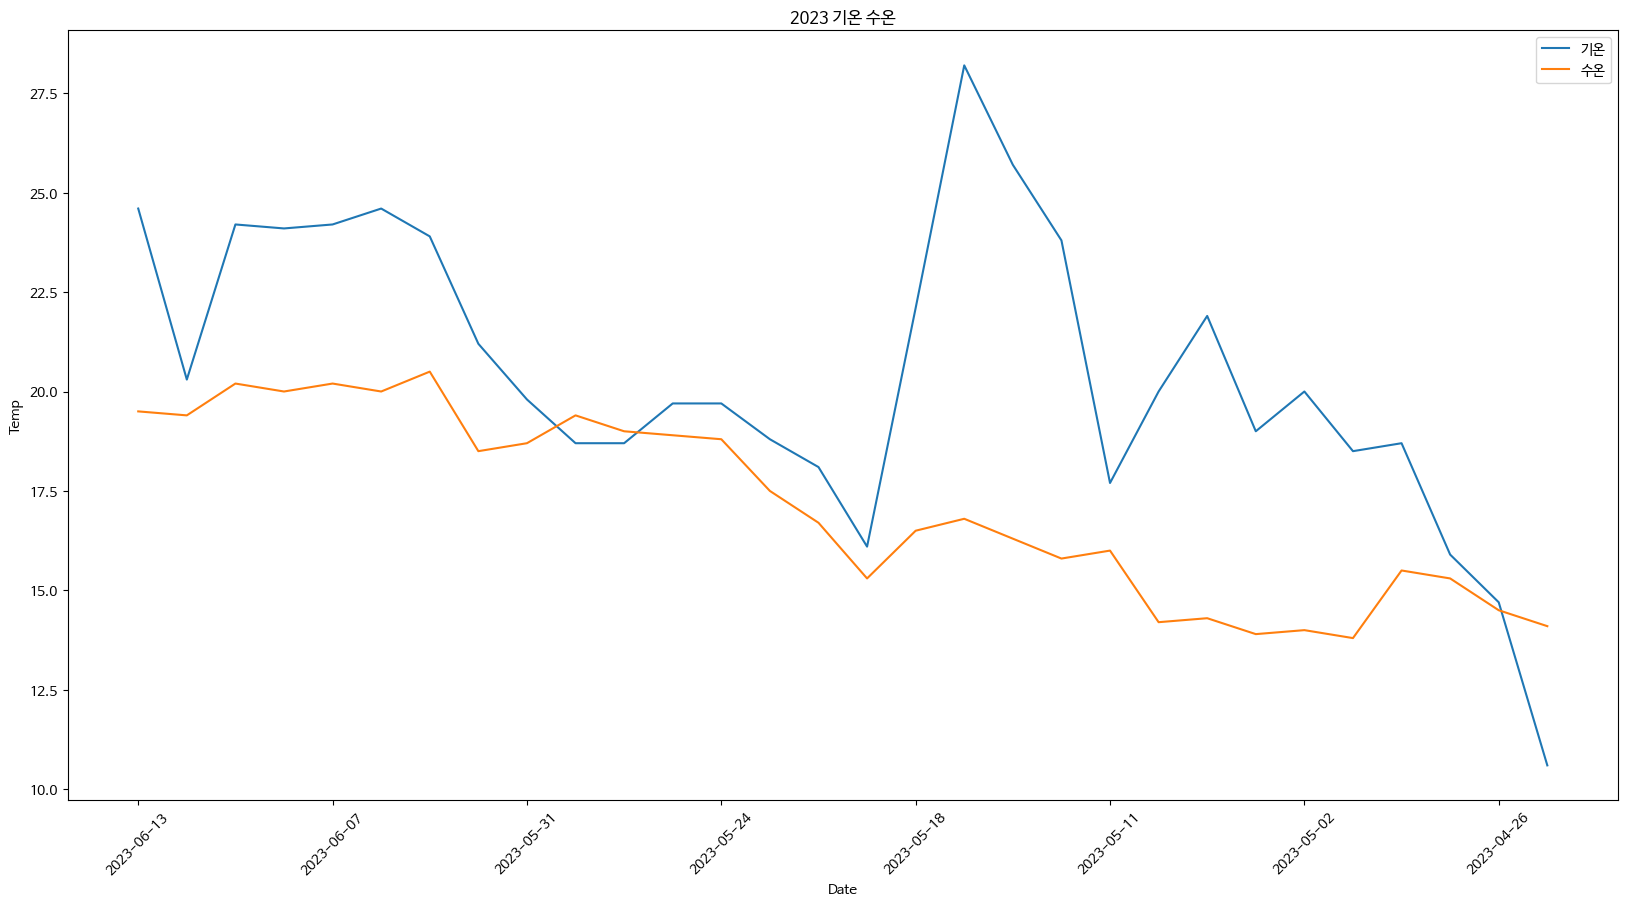

<Figure size 1000x600 with 0 Axes>

In [ ]:
x = df["obsDat"]
y = df["airTmp"]
y1 = df["wtrTmp"]

plt.plot(x,y)
plt.plot(x,y1)

plt.legend(["기온","수온"])
plt.xlabel("Date")
plt.ylabel("Temp")

plt.title("2023 기온 수온")
plt.xticks(range(0, len(x), 4), x[::4], rotation=45)
plt.figure(figsize=(10,6))
plt.rcParams["figure.figsize"] = (20,10)

plt.show()

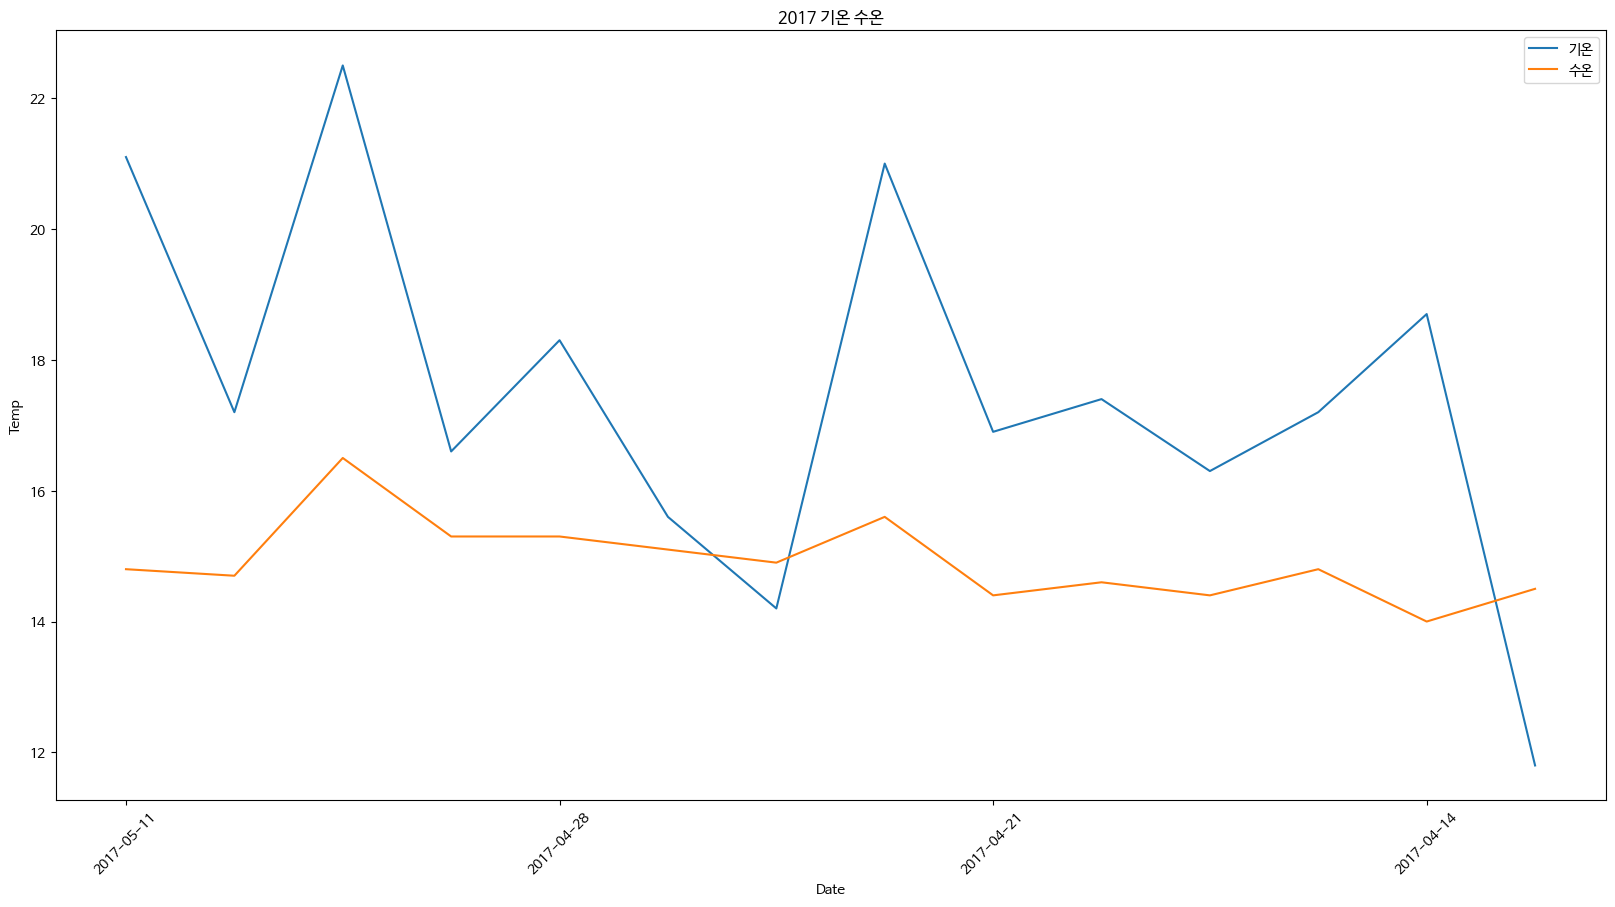

<Figure size 1000x600 with 0 Axes>

In [ ]:
x = df2["obsDat"]
y = df2["airTmp"]
y1 = df2["wtrTmp"]

plt.plot(x,y)
plt.plot(x,y1)

plt.legend(["기온","수온"])
plt.xlabel("Date")
plt.ylabel("Temp")

plt.title("2017 기온 수온")
plt.xticks(range(0, len(x), 4), x[::4], rotation=45)
plt.figure(figsize=(10,6))
plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [ ]:
print(df.corr(method="pearson"))

          airTmp    wtrTmp
airTmp  1.000000  0.493298
wtrTmp  0.493298  1.000000


<ipython-input-41-c6d40299e36c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method="pearson"))


<ipython-input-45-44942eadc0ab>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr())


<Axes: >

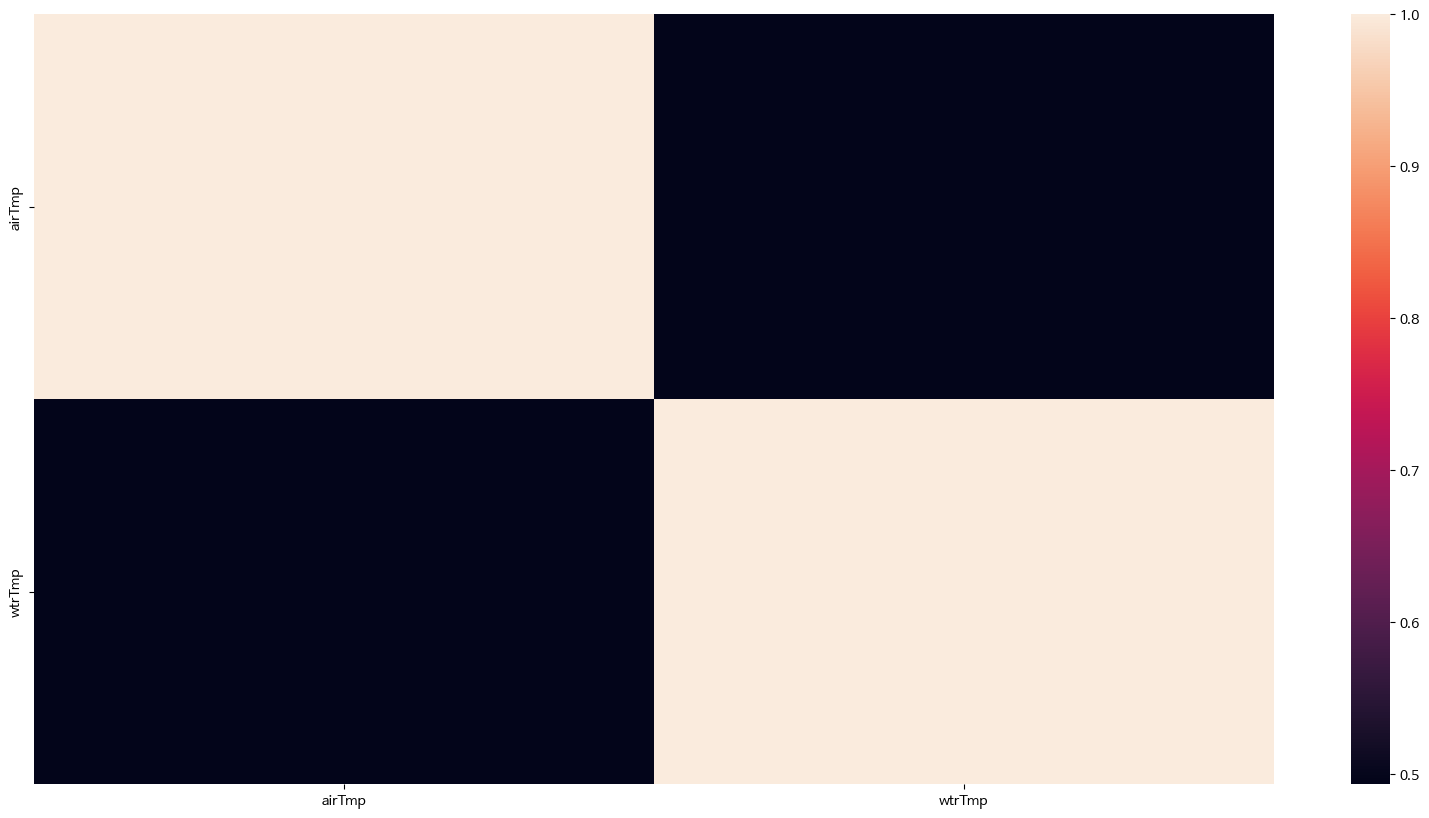

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data = df.corr())

<ipython-input-46-a3cb8edb6710>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df2.corr())


<Axes: >

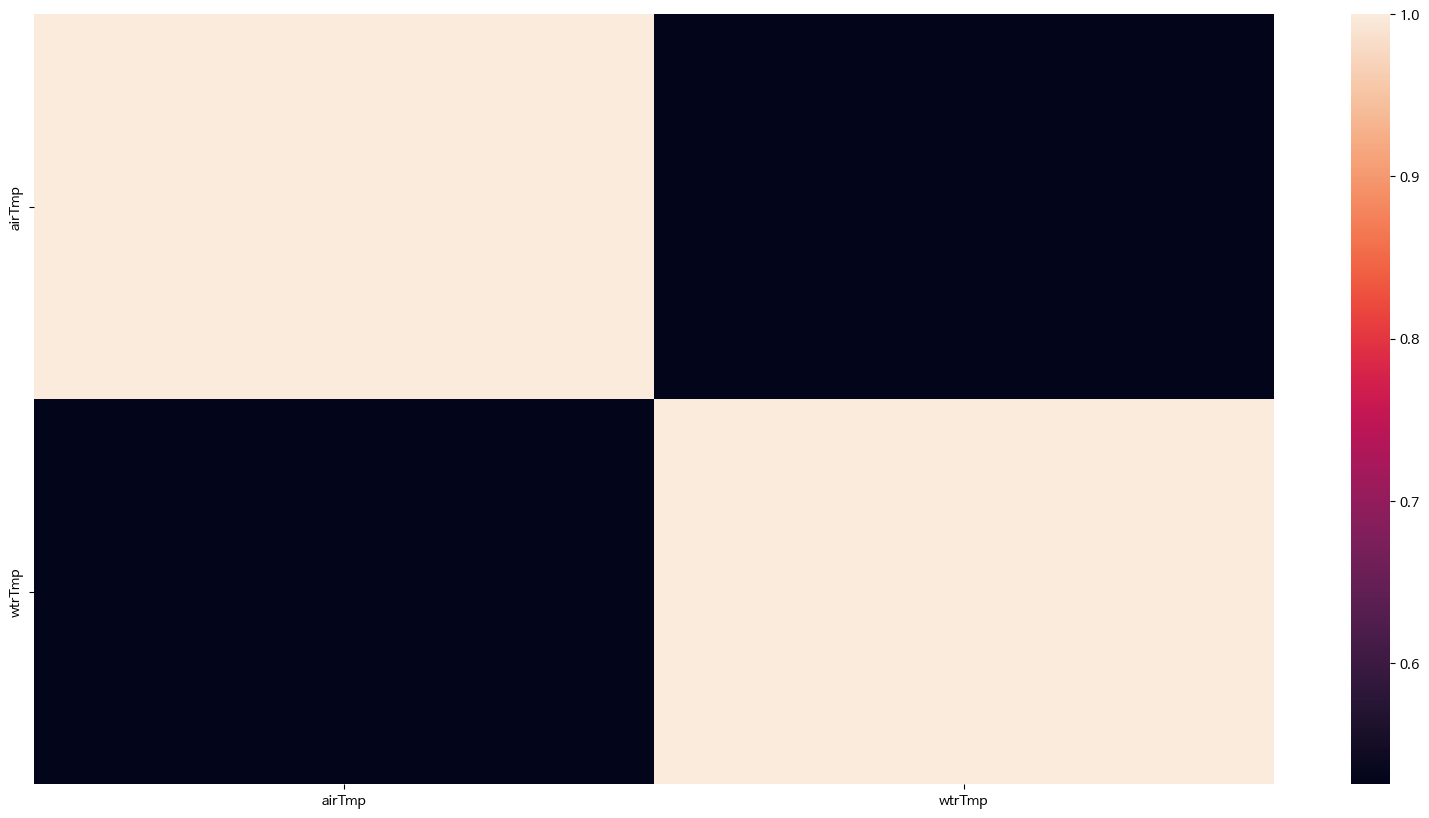

In [ ]:
sns.heatmap(data = df2.corr())